## <center> GRIP Internship - TASK 2

## <center> Prediction using Unsupervised ML
<p align="right"> <b><i>Author - Ashik Srinivas <b><i>

## Getting Started

- The dataset consists information of an iris plant along with its attributes such as sepal and petal measurements
- It contains 3 classes of 50 instances each, where each class refers to a type of iris plant

<b>TASKS:</b> <br>
- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [25]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
# loading the dataset from google drive
url = 'https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data = pd.read_csv(path)

In [27]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
data.shape

(150, 6)

In [29]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
data.duplicated().sum()

0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [33]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Observations:
- The dataset consists of 150 rows and 6 columns
- There are no null values present in the dataset
- There are no duplicated values either
- The 'Species' feature has three classes


## Data Visualization & Analysis

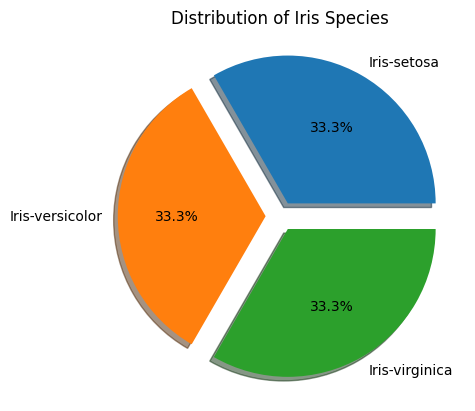

In [34]:
plt.pie(data['Species'].value_counts(), labels=data['Species'].unique(), explode=[0.1, 0.1, 0.1], autopct='%.1f%%', shadow=True)
plt.title('Distribution of Iris Species')
plt.show()

- Each species has its own share in the dataset and lies proportionate with each other
- Hence, there is no imbalance in the dataset

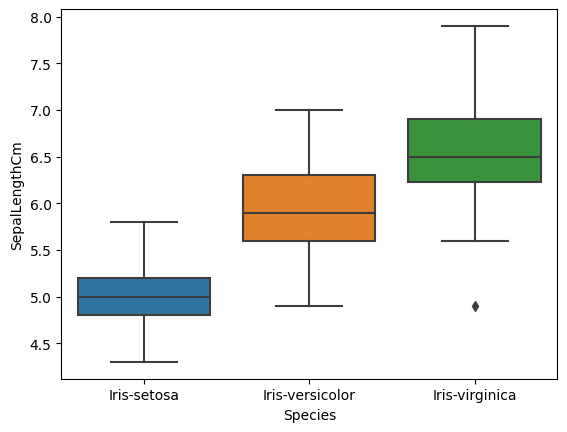

In [35]:
sns.boxplot(x='Species', y='SepalLengthCm', data=data);

- Only the class 'Iris-Virginica' contains some outliers

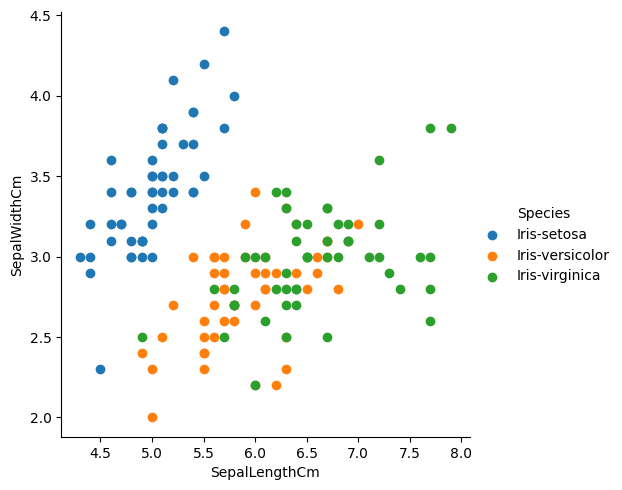

In [36]:
# comparing species using sepal length and width
sns.FacetGrid(data, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();

- Sepal length and width do not indicate any clusters in species and are mixed which indicates that it could not derive much information of different species using sepal length and width

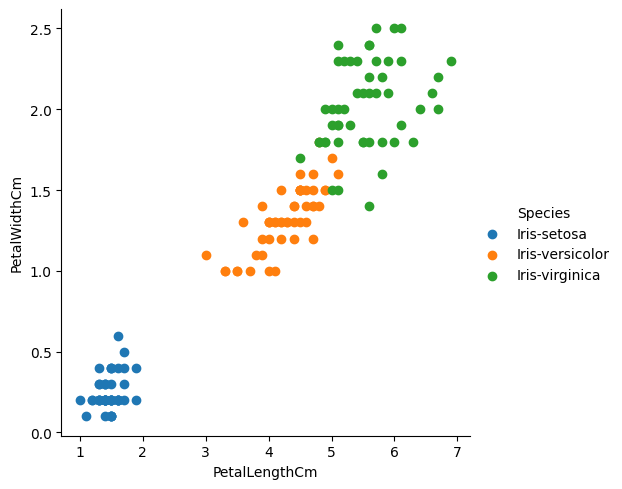

In [37]:
# comparing species using petal length and width
sns.FacetGrid(data, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();

- Unlike sepal measurements, petal measurements seems to form clusters of species which are quite linearly separable with other species
- Petal measurements can help in better and accurate predictions compared to sepal measurements

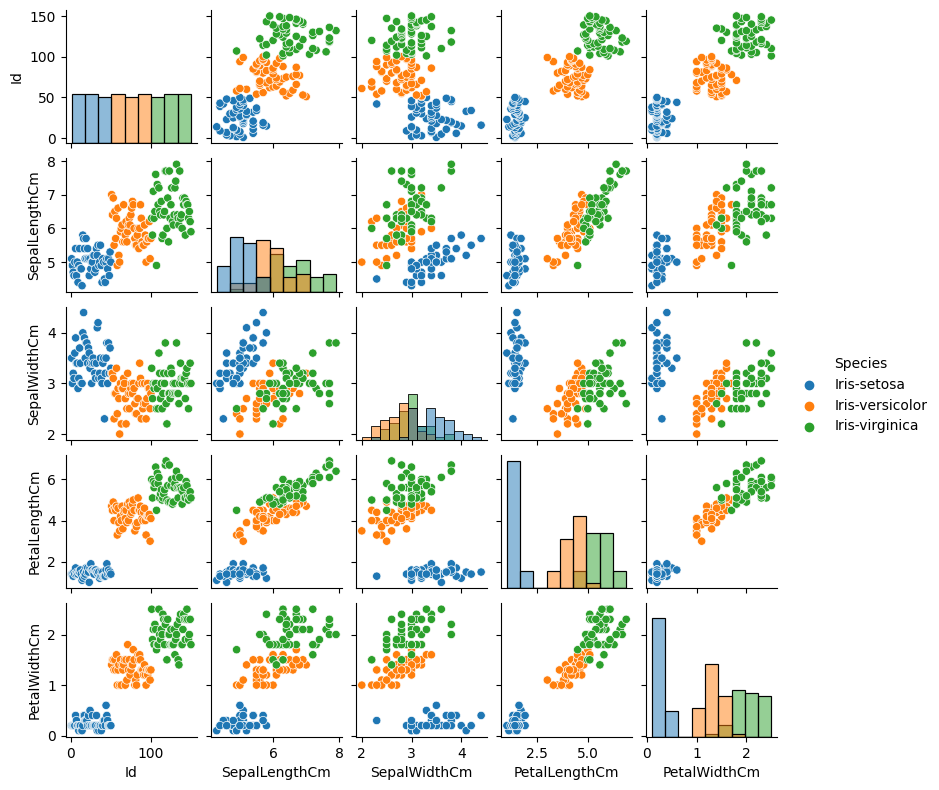

In [38]:
sns.pairplot(data, hue="Species", diag_kind="hist", height=1.6);

- The pairplot indicates that the species 'Versicolor' and 'Virginica' are very similar in accordance to the dataset
- To divide the dataset into clusters, each species should have its attributes specific without being too much similar to other species, it will help to divide clusters among the others

## Data Preprocessing

In [39]:
# saving a copy of base data
df = data.copy()

In [40]:
# removing id column as it only contains unique values and will create unwanted noise
# removing species column as it is our target variable
df.drop(['Id', 'Species'], inplace=True, axis=1)

## Finding n of clusters

In [41]:
# finding the optimum no of clusters using elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

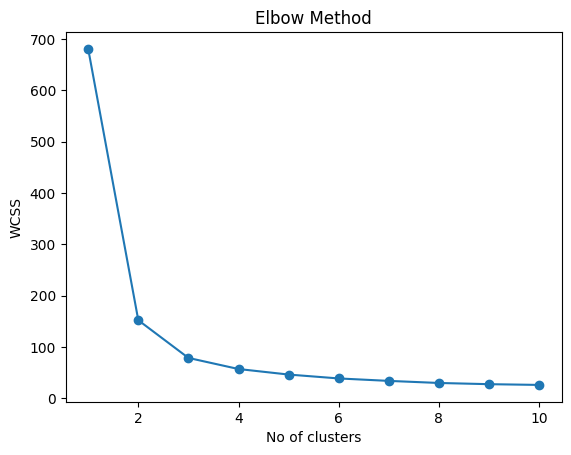

In [42]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

- After using elbow method, it is suffice to say that the optimum number of clusters for the dataset is <b>3</b>
- The sum of square distance(WCSS) decreases significantly after 3 cluster, so we shall stall after it as well


## Model Building

In [58]:
# kmeans with 3 as n of clusters
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred = model.fit_predict(df)

model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

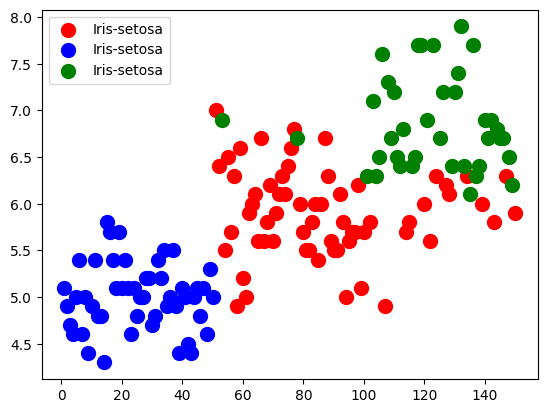

In [61]:
# plotting the clusters of the model
x = data.iloc[:, [0, 1, 2, 3]].values

plt.scatter(x[pred == 0, 0], x[pred ==0, 1], 100, 'red', label='Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred ==1, 1], 100, 'blue', label='Iris-setosa')
plt.scatter(x[pred == 2, 0], x[pred ==2, 1], 100, 'green', label='Iris-setosa')

plt.legend();

#### TASKS
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

#### RESULT
The optimum number of cluster for the iris dataset is 3